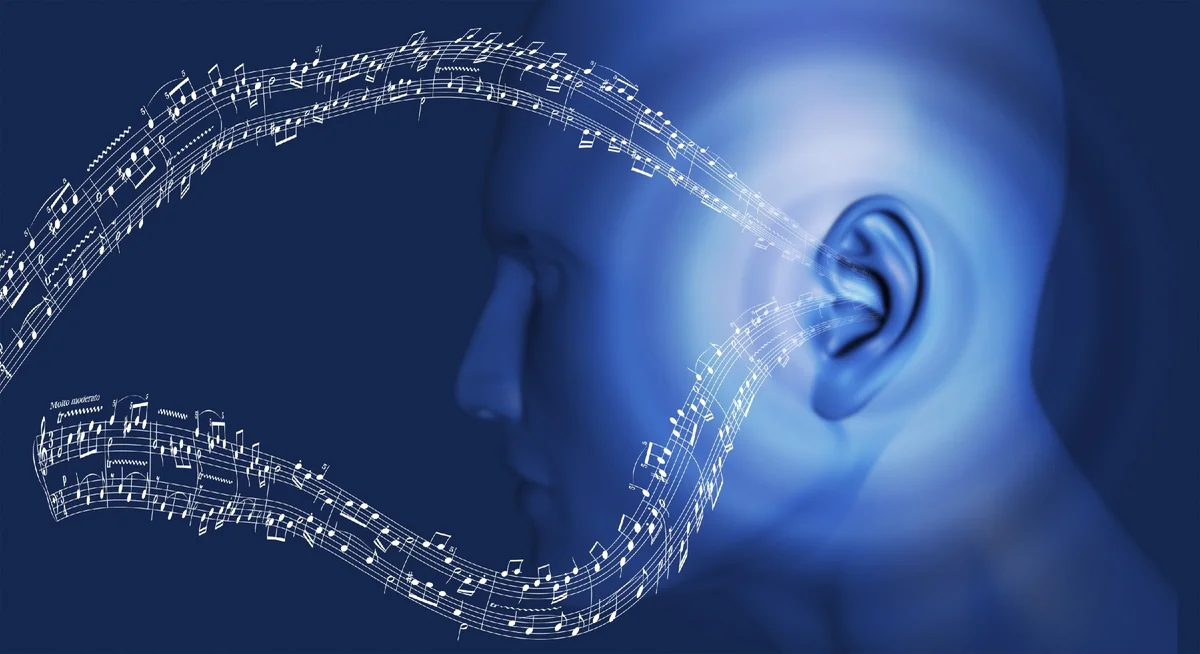

In [3]:
import warnings
warnings.filterwarnings('ignore')


import librosa # самый стандартный модуль Python для работы с аудио
import IPython.display as ipd # позволяет воспроизводить звук прямо в ноутбуке jupyter.


# отрисовка звука
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

# путь до файла
audio_path = '/content/piano.mp3'

# воспроизводим
ipd.Audio(audio_path)

In [4]:
x , sr = librosa.load(audio_path)

print(type(x), type(sr)) # возвращает временной ряд аудио в виде массива numpy 
print('----------------')

librosa.load(audio_path, sr=44100) # с частотой дискретизации
librosa.load(audio_path, sr=None) # чтобы отключить повторный выбор

<class 'numpy.ndarray'> <class 'int'>
----------------


(array([-6.1035156e-05, -1.2207031e-04, -9.1552734e-05, ...,
         4.2724609e-04,  4.5776367e-04,  3.9672852e-04], dtype=float32), 44100)

**важные заметки на полях:**

- частота дискретизации - это количество отсчетов звука, передаваемых в секунду, измеренное в Гц. (44100 - качество компакт-диска; 48000 - для кино)

- звуковой сигнал может быть доступен в разных форматах, обычно речь идет об mp3 (предполагает запись звука со сжатием) или wav (детализированная и несжатая версия аудиозаписи).

- еще есть формат midi: файл цифрового интерфейса музыкального инструмента, который не содержит аудиоданных, зато в нем зафиксирована информация про ноты.

**пока остановимся на звуках, которые мы слышим ухом** и можем записать (или скачать из ВК), формализуемся:


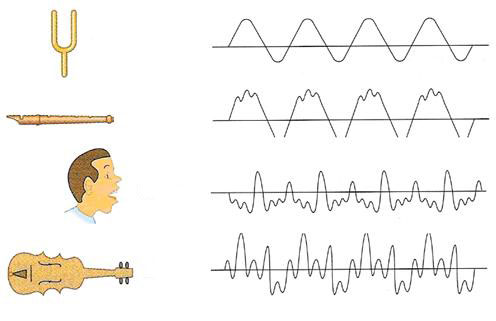

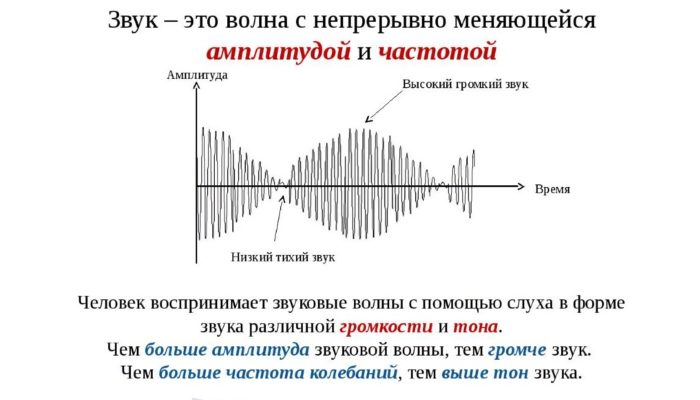

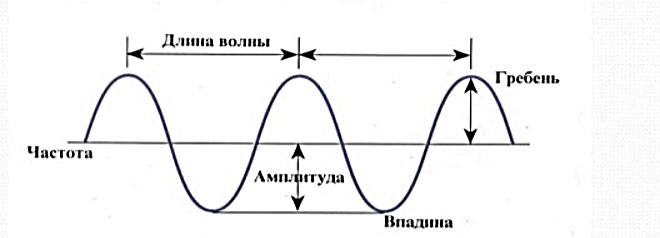

в программах мы будем практически всегда видеть отображение именно этого графика (частота, амплитуда от времени), например: 
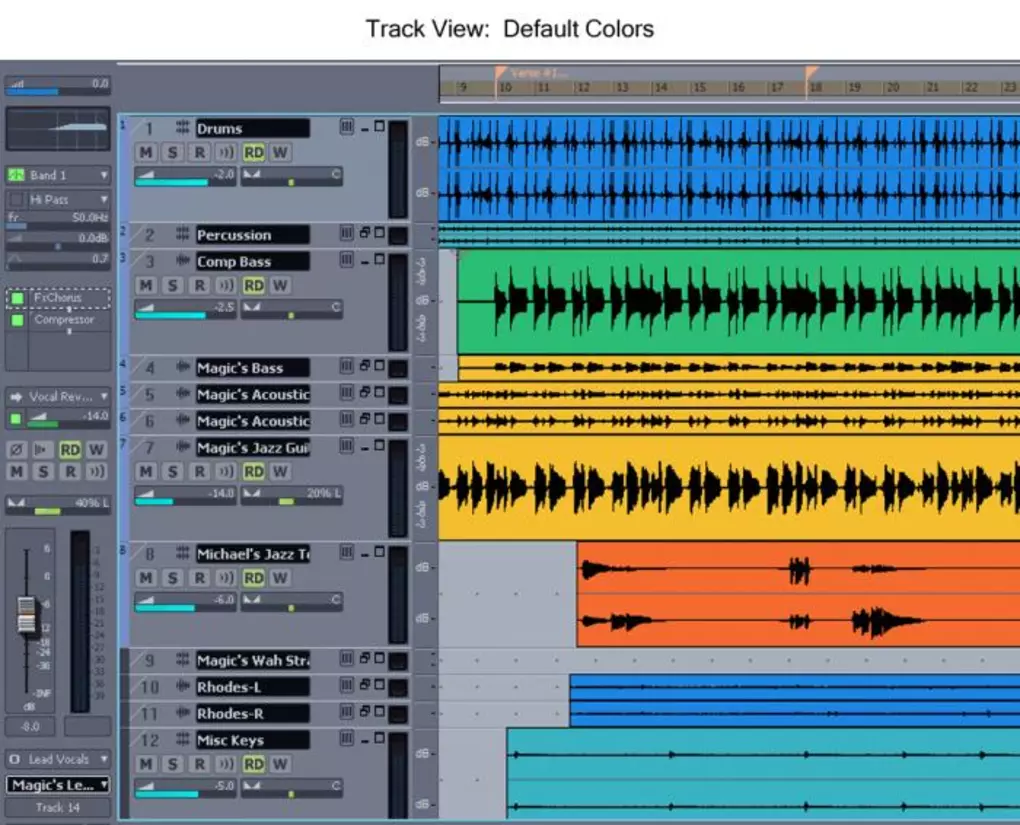

итак, сигналы можно разложить на ряд чистых синусоидальных волн: частота синусоидальных волн указывает частоты звука (высоты тона), присутствующие в аудиосигнале.

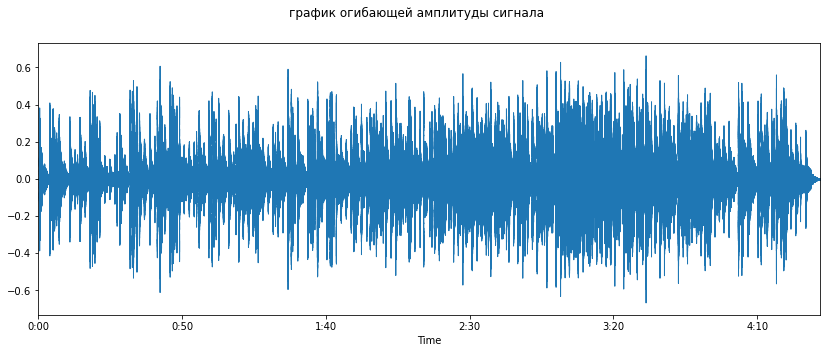

In [5]:
# вернемся к нашему файлу

plt.figure(figsize=(14, 5));
plt.suptitle("график огибающей амплитуды сигнала");
librosa.display.waveplot(x, sr=sr);

очевидно, что не всегда это информативно.


**спектрограмма** - изображение, показывающее зависимость спектральной плотности мощности сигнала от времени.

т.е. показывает частоты, используемые в конкретный момент времени

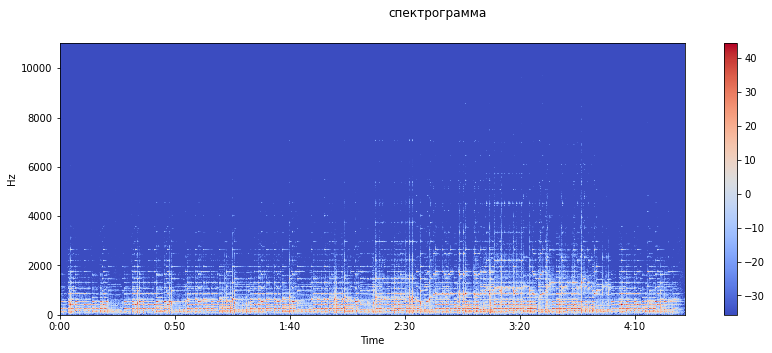

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5));
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar();
plt.suptitle("спектрограмма");

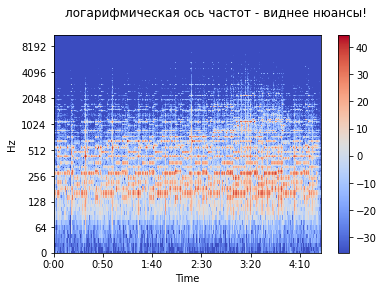

In [7]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.suptitle("логарифмическая ось частот - виднее нюансы!");

ассоциируясь с ПО:

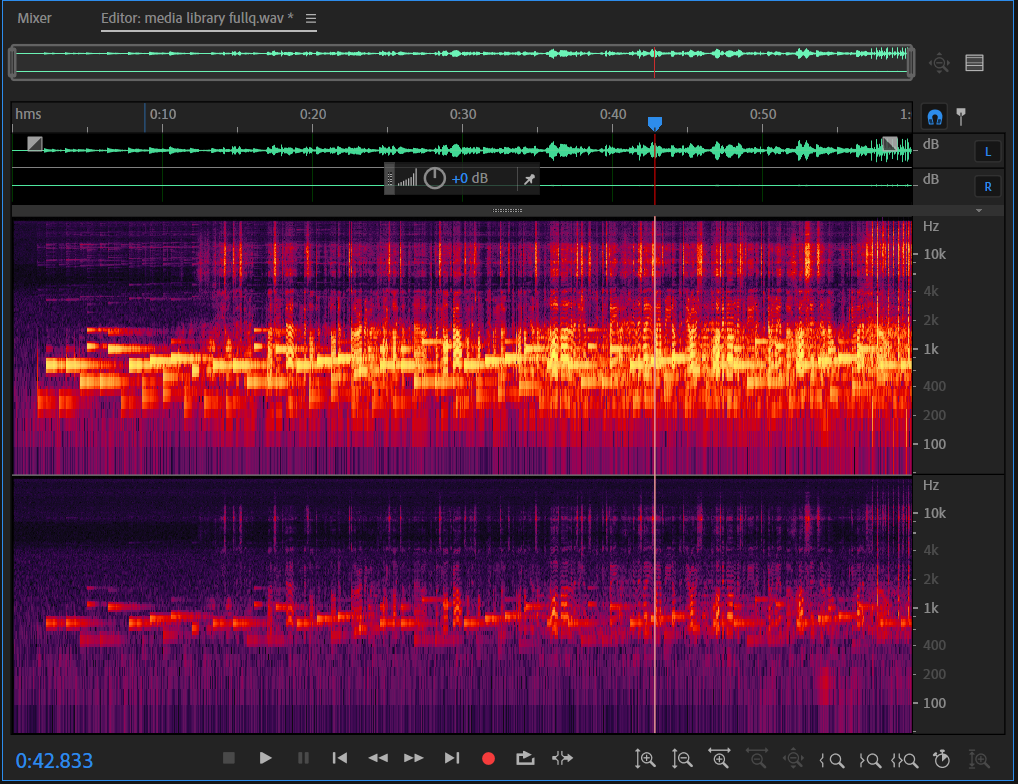

**вернемся к MIDI**

глобально речь о том, что партитуру можно записать, используя кодирование нот. и эта идея не нова.

**Механическое пианино**

простая реализация: ввод - непрерывный рулон бумаги с пробитыми в нем отверстиями (согласно нотам исполняемого музыкального произведения), рулон крутится, приводя в действие молоточки, соответствующие клавишам.

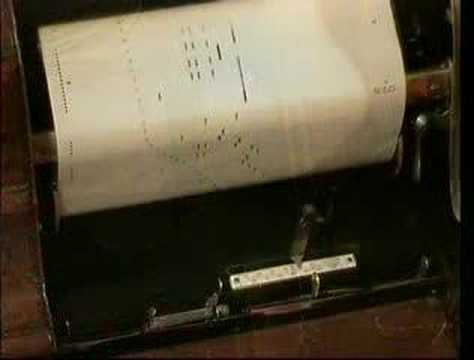

In [13]:
ipd.display( ipd.YouTubeVideo("2A6ZXZwl3nA", start=106) )

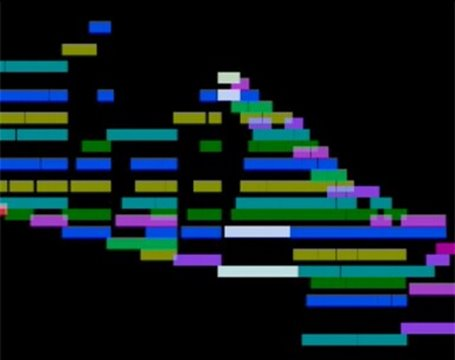

In [14]:
ipd.display( ipd.YouTubeVideo("LlvUepMa31o", start=15) )

**MIDI-сообщения кодируют информацию для каждого нотного события: начало ноты, смещение ноты и интенсивность («скорость» в терминологии MIDI).**

основной параметр - скорость нажатия клавиш - представляет собой целое число от 0 до 127 (сила удара по клавише).

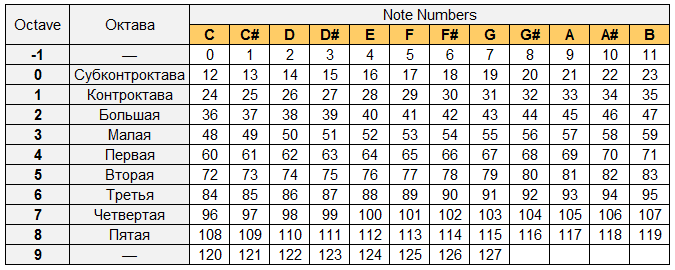

второй важный параметр - **какой инструмент** мы имеем в виду: для этого указывается номер MIDI-канала (целое число от 0 до 15)

остается **темп**:  значение темпа записывается в микросекундах, и говорит о том,сколько времени должна звучать каждая из «четвертных нот».

обычно используют кодирование по количеству импульсов на четвертную ноту (PPQN), но MIDI может кодировать темп с точки зрения ударов в минуту (BPM), что позволяет получать информацию об абсолютном времени.

In [8]:
!pip install mido==1.2.9 # библиотека для работы с MIDI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 KB 2.7 MB/s eta 0:00:00


In [10]:
from mido import MidiFile

mid = MidiFile('piano_02.mid', clip=True)
print(mid)
print('---------->')
print('расшифруем: файл MIDI имеет 25 синхронных дорожек с 18719 сообщениями внутри них.')
print ('у каждого MidiFile есть свойство (type), определяющее, как дорожки взаимодействуют друг с другом.')

<midi file 'piano_02.mid' type 1, 25 tracks, 18719 messages>
---------->
расшифруем: файл MIDI имеет 25 синхронных дорожек с 18719 сообщениями внутри них.
у каждого MidiFile есть свойство (type), определяющее, как дорожки взаимодействуют друг с другом.


поясним: 
* тип 0 (один трек): все сообщения сохраняются на одном треке
* тип 1 (синхронный): все дорожки запускаются одновременно
* тип 2 (асинхронный): каждая дорожка независима от других

In [11]:
print('посмотрим названия дорожек и количество сообщений в каждой дорожке.')
print('----------->')
for track in mid.tracks:
    print(track)

посмотрим названия дорожек и количество сообщений в каждой дорожке.
----------->
<midi track '' 24 messages>
<midi track 'Pianoforte' 6428 messages>
<midi track 'violins 1 & 2' 11054 messages>
<midi track 'viola' 180 messages>
<midi track 'cellos' 224 messages>
<midi track 'Bass' 375 messages>
<midi track 'flute' 111 messages>
<midi track 'Oboe' 57 messages>
<midi track 'Clarinet' 83 messages>
<midi track 'Bassoon' 104 messages>
<midi track '' 2 messages>
<midi track 'French Horns' 51 messages>
<midi track '' 2 messages>
<midi track '' 2 messages>
<midi track '' 2 messages>
<midi track '' 2 messages>
<midi track '' 2 messages>
<midi track '' 2 messages>
<midi track '' 2 messages>
<midi track '' 2 messages>
<midi track '' 2 messages>
<midi track '' 2 messages>
<midi track '' 2 messages>
<midi track '' 2 messages>
<midi track '' 2 messages>


In [12]:
print('можем просмотреть сообщения в треке')
print('----------->')
for msg in mid.tracks[0]:
    print(msg)

можем просмотреть сообщения в треке
----------->
<meta message time_signature numerator=4 denominator=4 clocks_per_click=96 notated_32nd_notes_per_beat=8 time=0>
<meta message sequencer_specific data=(0, 0, 65) time=0>
<meta message set_tempo tempo=750000 time=0>
<meta message set_tempo tempo=714285 time=11312>
<meta message set_tempo tempo=500000 time=12328>
<meta message set_tempo tempo=714285 time=316>
<meta message set_tempo tempo=500000 time=8648>
<meta message set_tempo tempo=714285 time=436>
<meta message set_tempo tempo=681818 time=32624>
<meta message set_tempo tempo=600000 time=3764>
<meta message set_tempo tempo=666666 time=1896>
<meta message set_tempo tempo=631578 time=25316>
<meta message set_tempo tempo=666666 time=5724>
<meta message set_tempo tempo=521739 time=7300>
<meta message set_tempo tempo=666666 time=840>
<meta message set_tempo tempo=600000 time=3072>
<meta message set_tempo tempo=500000 time=21652>
<meta message set_tempo tempo=600000 time=884>
<meta message s

**MusicXML**

- формат файла на основе XML для представления западной нотной записи.

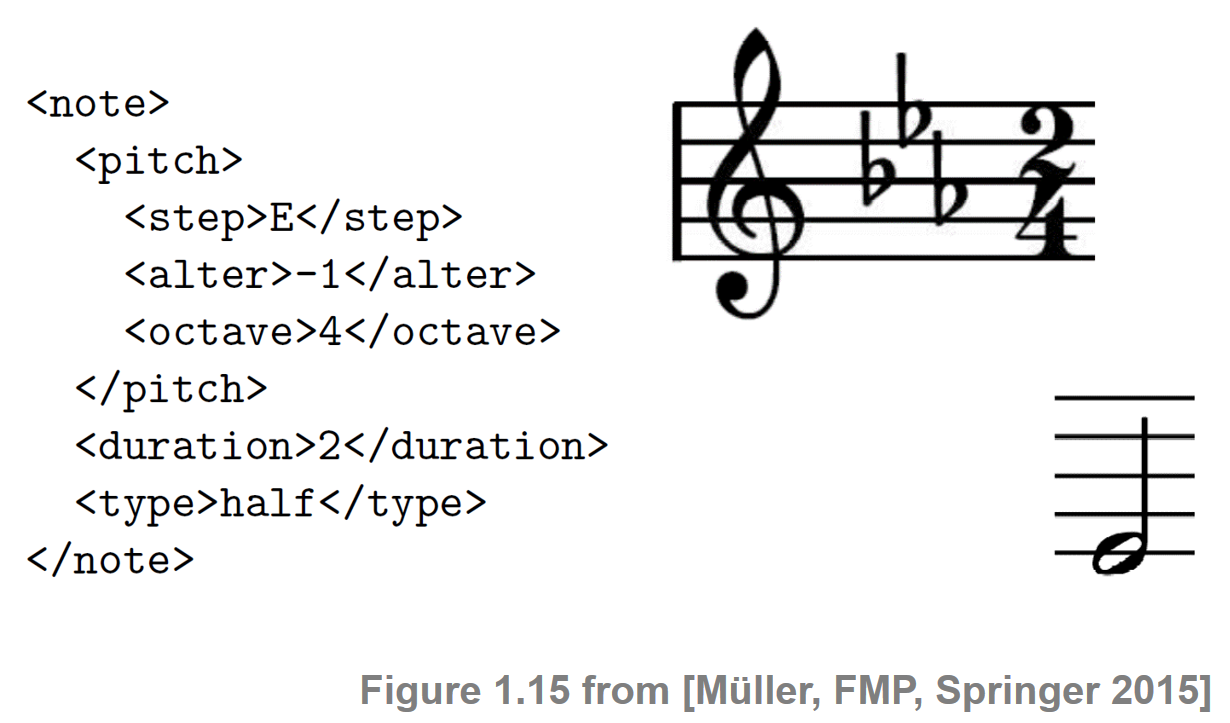